In [1]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from regression_utils import *

np.set_printoptions(suppress=True)
np.random.seed(1)
%matplotlib inline

In [2]:
# convention followed in relation to scikit documentation 
# y = countryQuantity 
# y1 = countryQuantityTrain
# Y = countryQuantityTest
# y_pred = countryQuantityPredict

# X = years 
# X1 = yearsTrain
# x_mis = yearsTest
# x = yearsPredict

# c = combinedZip

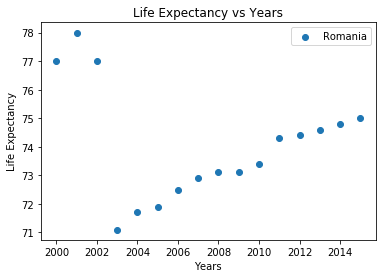

/home/mihir/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:357: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


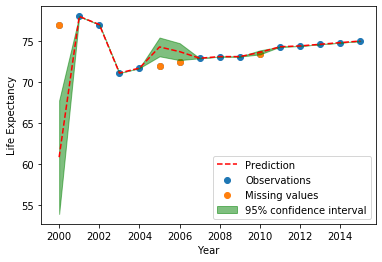

In [3]:
#reading data from csv 
df = pd.read_csv('datasets_12603_17232_Life Expectancy Data.csv')

# Quantity variation of 3 countries (Germany, Netherlands, Spain)
# change here 
country = 'Romania'
countryDF = countryDF(country, df)
countryQuantity = columnExtractor(countryDF,'Life expectancy')

years = columnExtractor(countryDF,'Year')
#plotQuantities(years, countryQuantity,'Years','Population', country,'Population vs Years')
plotQuantities(years, countryQuantity, 'Years', 'Life Expectancy', country, 'Life Expectancy vs Years')

countryQuantityTrain, yearsTrain, countryQuantityTest, yearsTest = randomizer(countryQuantity, years)
# Mesh the input space for evaluations of the real function, the prediction and its MSE
#x = np.atleast_2d(np.linspace(0, 10, 1000)).T
yearsPredict = np.array(np.linspace(2000, 2015, 16)).reshape(-1,1)

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(yearsTrain, countryQuantityTrain)

# Make the prediction on the meshed x-axis (ask for MSE as well)
countryQuantityPredict, sigma = gp.predict(yearsPredict, return_std=True)

#change here 
plotFinal(years, countryQuantity, yearsTrain, countryQuantityTrain, yearsTest, countryQuantityTest, yearsPredict, countryQuantityPredict, 'Life Expectancy', sigma, regression_type = 'Gaussian')

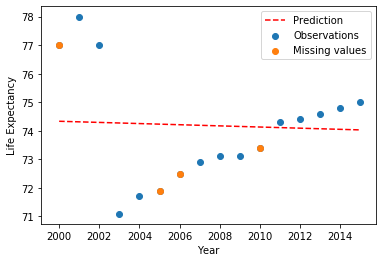

In [4]:
#################LINEAR REGRESSION#################
# convention followed in relation to scikit documentation 

yearsPredict = np.array(np.linspace(2000, 2015, 16)).reshape(-1,1)

# # Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(yearsTrain, countryQuantityTrain)

# Make predictions using the testing set
countryQuantityPredictLR = regr.predict(yearsPredict)

# Plot outputs
plotFinal(years, countryQuantity, yearsTrain, countryQuantityTrain, yearsTest, countryQuantityTest, yearsPredict, countryQuantityPredictLR, 'Life Expectancy',0,regression_type='Linear')

GPR Prediction 
 [[60.84794    78.         77.         71.1        71.7        74.27715709
  73.70233439 72.9        73.1        73.1        73.61562715 74.3
  74.4        74.6        74.8        75.        ]]
Actual 
 [77.0, 78.0, 77.0, 71.1, 71.7, 71.9, 72.5, 72.9, 73.1, 73.1, 73.4, 74.3, 74.4, 74.6, 74.8, 75.0]
GPR error:  [[-20.9767013    0.          -0.           0.          -0.
    3.30619902   1.65839226   0.          -0.           0.
    0.29376996  -0.           0.          -0.           0.
   -0.        ]]
------------------------------------------
LR Prediction 
 [[74.33339689 74.31318716 74.29297744 74.27276772 74.25255799 74.23234827
  74.21213854 74.19192882 74.1717191  74.15150937 74.13129965 74.11108993
  74.0908802  74.07067048 74.05046076 74.03025103]]
Actual 
 [77.0, 78.0, 77.0, 71.1, 71.7, 71.9, 72.5, 72.9, 73.1, 73.1, 73.4, 74.3, 74.4, 74.6, 74.8, 75.0]
LR error  [[-3.46312093 -4.72668313 -3.51561372  4.46240185  3.56005299  3.24387798
   2.36157041  1.77219317  1.

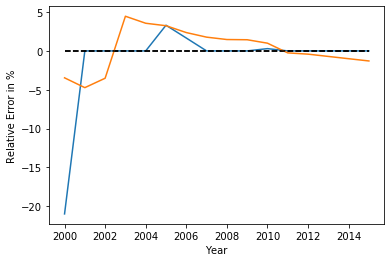

In [5]:
# error computation for GPR 
years = columnExtractor(countryDF,'Year').tolist()
error = errorComputation(countryDF, countryQuantityPredict, 'Life expectancy',regression_type='GPR')
print('GPR error: ',error)
errorPlot(years, error, 'Year', 'Relative Error in %')

print('------------------------------------------')
years = columnExtractor(countryDF,'Year').tolist()
error = errorComputation(countryDF, countryQuantityPredictLR, 'Life expectancy',regression_type='LR')
print('LR error ',error)
errorPlot(years, error, 'Year', 'Relative Error in %',regression_type='LR')

plt.show()